In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/chess/games.csv


In [2]:
#Question 1 will be what is the most popular chess opening and what are the best alternatives
#Q1 outcome variable will be most_played, second_popular, third_popular
#To explore the outcome varaible most_played, I plan to look at how many times an opening is played,
#Q1 will contain the following models: times opening played(opening_name variable) and which opening (opening_name)

In [3]:
#Question 2 will be which chess opening results are definitive: win or loss and how many wins and losses are there in the dataset
#Question 2 will have the outcome variable opening_wins to detect which opening has the most definitive conclusions
#To explore the outcome variable, I plan to look at the opening_names and see which opening contains the most "win","loss","draw" for the top 3 most popular openings as found in Q1
#Q2 will contain the following models: times opening played, how many wins per top 3 openings

In [4]:
#Question 3 will be which chess opening results in the most and which has the least amount of moves
#Q3 outcome variable will be most_moves and least_moves
#To explore the outcome variable, I plan to look at the average amount of moves for the entire dataset, the opening which has the average of most moves, and the opening with the least moves
#To explore this, I will use pivot tables
#Q3 will contain the following models: average moves per top openings and the min/max for each too

In [5]:
#This is code to read and get some basic info on the chess set
chess_set = pd.read_csv("/kaggle/input/chess/games.csv")
print(chess_set.head())
chess_set.info()

         id  rated    created_at  last_move_at  turns victory_status winner  \
0  TZJHLljE  False  1.504210e+12  1.504210e+12     13      outoftime  white   
1  l1NXvwaE   True  1.504130e+12  1.504130e+12     16         resign  black   
2  mIICvQHh   True  1.504130e+12  1.504130e+12     61           mate  white   
3  kWKvrqYL   True  1.504110e+12  1.504110e+12     61           mate  white   
4  9tXo1AUZ   True  1.504030e+12  1.504030e+12     95           mate  white   

  increment_code       white_id  white_rating      black_id  black_rating  \
0           15+2       bourgris          1500          a-00          1191   
1           5+10           a-00          1322     skinnerua          1261   
2           5+10         ischia          1496          a-00          1500   
3           20+0  daniamurashov          1439  adivanov2009          1454   
4           30+3      nik221107          1523  adivanov2009          1469   

                                               moves opening_e

Q1

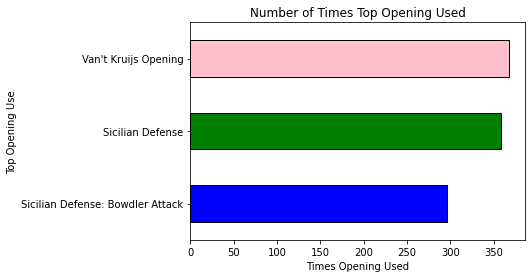

,opening_name
Van't Kruijs Opening,368
Sicilian Defense,358
Sicilian Defense: Bowdler Attack,296


In [6]:
#Q1 Find out how many different openings are played in the data set
open_count = chess_set["opening_name"].value_counts()
open_count.head(3).sort_values().plot(kind='barh',color=['blue','green','pink'],edgecolor='black')
plt.xlabel('Times Opening Used')
plt.ylabel('Top Opening Use')
plt.title('Number of Times Top Opening Used')
plt.show()
open_count.to_frame().head(3)
#This graph shows the top three most played openings, the Van't Kruijs Opening, the Sicilian Defense, and the Sicilian Defence: Bowdler Attack Variation

Q2

Resign    0.606540
Mate      0.344161
Draw      0.049298
Name: outcomes, dtype: float64


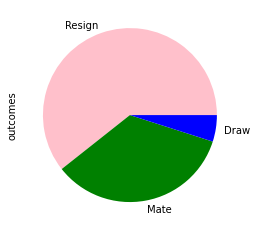

In [7]:
#Question 2 will be which chess opening results are definitive: win or loss (no draws), and how many wins and losses are there in the dataset
fig, ax = plt.subplots()
WLD = {'outoftimes':'Out Of Time','resign':'Resign','mate':'Mate','draw':'Draw'}
chess_set['outcomes']=chess_set.victory_status.map(WLD)
outcomes = chess_set.outcomes.value_counts(normalize=True)
print(outcomes)
#This code tells me there is a 55% chance of resignation, a  31% chance of a mate, an 08% chance of outoftime, and a 04% chance of a draw
outcomes.plot(kind='pie', colors = ['pink','green','blue','grey'])
ax.set_xlabel = ('Outcomes')

plt.show()
#This solves the first of the Q2 of what are the different amount of game resolutions in the dataset. It is clear that there is a large amount of resignations with smaller amounts of mates, and even less out of times, and less draws.VKOW = chess_set[(chess_set.eins)] 

In [8]:
#The second part of question two will explore which opening contains the most amount of wins for each color of the top three most popular openings
VKW = chess_set[(chess_set.victory_status == 'resign') & (chess_set.winner =='white')& (chess_set.opening_name=="Van't Kruijs Opening")].value_counts().sum()
#This shows that there is 79 victories for white in the VK
VKB = chess_set[(chess_set.victory_status == 'resign') & (chess_set.winner =='black')&(chess_set.opening_name=="Van't Kruijs Opening")].value_counts().sum()
#This shows that there are 92 victories for black in the VK
SDW = chess_set[(chess_set.victory_status == 'resign') & (chess_set.winner =='white')&(chess_set.opening_name=="Sicilian Defense")].value_counts().sum()
#This shows that there are 94 victories for white using the SD
SDB = chess_set[(chess_set.victory_status == 'resign') & (chess_set.winner =='black')&(chess_set.opening_name=="Sicilian Defense")].value_counts().sum()
#This shows that there are 110 victories for black using the SD
SDBAW = chess_set[(chess_set.victory_status == 'resign') & (chess_set.winner =='white')&(chess_set.opening_name=="Sicilian Defense: Bowdler Attack")].value_counts().sum()
#This shows that there are 110 victories for white using the SDBA
SDBAB = chess_set[(chess_set.victory_status == 'resign') & (chess_set.winner =='black')&(chess_set.opening_name=="Sicilian Defense: Bowdler Attack")].value_counts().sum()
#This shows that there are 82 victories for black using the SDBA

wins_for_white = [VKW, SDW, SDBAW]
wins_for_black = [VKB, SDB, SDBAB]
chess_set['total_wins'] = pd.Series(tuple([wins_for_white, wins_for_black]))
#chess_set.pivot_table(values=['opening_name'],index=['victory_status'])
chess_set['victory_status'].value_counts().to_frame()

,victory_status
resign,11147
mate,6325
outoftime,1680
draw,906


Q3

In [9]:
#The first section of Q3 will find what is the maximum amount of moves in the dataset in a game, what is the minimum amount of moves in a game, and what is the average amount of moves per game.
most_moves = chess_set['turns'].max()
average_moves = chess_set["turns"].mean()
least_moves = chess_set["turns"].min()
#These three variables determine the max, min, and average of the games.
#print("Most Moves in dataset:" + str(most_moves), "Average Moves of dataset:"+str(average_moves), "Least_Moves in dataset:"+str(least_moves))
#vkmax = chess_set[(chess_set["turns"]==max(chess_set["turns"])&(chess_set.opening_name=="Van't Kruijs Opening")



#vkmax is Van't Kruijs max moves
vkmin = chess_set[(chess_set["turns"]==chess_set["turns"])& (chess_set.opening_name=="Van't Kruijs Opening")]


#vkmin is Van't Kruijs min moves
vkave = chess_set[(chess_set["turns"]==chess_set["turns"].mean)& (chess_set.opening_name=="Van't Kruijs Opening")]
#vkave is Van't Kruijs average moves
sdmax = chess_set[(chess_set["turns"]==chess_set["turns"].max)& (chess_set.opening_name=="Sicilian Defense")]
#sdmax is the Sicilian Defense max moves
sdmin = chess_set[(chess_set["turns"]==chess_set["turns"].min)& (chess_set.opening_name=="Sicilian Defense")]
#sdmin is the Sicilian Defense min moves
sdave = chess_set[(chess_set["turns"]==chess_set["turns"].mean)& (chess_set.opening_name=="Sicilian Defense")]
#sdave is the Sicilian Defense average moves
sdbamax = chess_set[(chess_set["turns"]==chess_set["turns"].max)& (chess_set.opening_name=="Sicilian Defense: Bowdler Attack")]
#sdbamax is the Sicilian Defense: Bowdler Attack max moves
sdbamin = chess_set[(chess_set["turns"]==chess_set["turns"].min)& (chess_set.opening_name=="Sicilian Defense: Bowdler Attack")]
#sdbamin is the Sicilian Defense: Bowdler Attack min moves
sdbaave = chess_set[(chess_set["turns"]==chess_set["turns"].mean)& (chess_set.opening_name=="Sicilian Defense: Bowdler Attack")]
#sdbaave is the Sicilian Defense: Bowdler Attack average moves
#print(min(vkmin))

#The above code is intented to find out the max, min, and average moves for each of the focused openings, this code will be saved and reused for a later date.


chess_set.pivot_table(values="turns",index="opening_name",aggfunc=np.min).head()
#The table below indicates the minimum amount of turns for each opening

,turns
opening_name,
Alekhine Defense,2
Alekhine Defense #2,13
Alekhine Defense #3,26
Alekhine Defense: Balogh Variation,34
Alekhine Defense: Brooklyn Variation,27


In [10]:
chess_set.pivot_table(values="turns",index="opening_name",aggfunc=np.max).head()
#The table below indicates the maximum amount of turns that occur for each opening

,turns
opening_name,
Alekhine Defense,163
Alekhine Defense #2,118
Alekhine Defense #3,26
Alekhine Defense: Balogh Variation,34
Alekhine Defense: Brooklyn Variation,59


In [11]:
chess_set.pivot_table(values="turns",index="opening_name").head()
#The table below indicates the average amount of turns that occur for each opening

,turns
opening_name,
Alekhine Defense,57.717391
Alekhine Defense #2,56.666667
Alekhine Defense #3,26.000000
Alekhine Defense: Balogh Variation,34.000000
Alekhine Defense: Brooklyn Variation,43.000000


In [12]:
less_than_10_turns = chess_set['less_than_10_turns']= chess_set.turns.value_counts()<=10
chess_set.less_than_10_turns.value_counts().to_frame()
#This code identifies how many games are less than, and how many are greater than 10 turns
#The false row indicates that there are 159 games that are more than 10 moves, with 49 games that are not

,less_than_10_turns
False,159
True,52


In [13]:
less_than_50_turns = chess_set['less_than_50_turns']= chess_set.turns.value_counts()<=50
chess_set.less_than_50_turns.value_counts().to_frame()
#This code identifies how many games are less than, and how many are greater than 50 turns
#The false row indicates that there are 94 games that are less than 50 moves, with 117 games that are not

,less_than_50_turns
False,117
True,94


In [14]:
less_than_100_turns = chess_set['less_than_100_turns']= chess_set.turns.value_counts()<=100
chess_set.less_than_100_turns.value_counts().to_frame()
#This code identifies how many games are less than, and how many are greater than 100 turns
#The false row indicates that there are 153 games that are less than 100 moves, with 94 games that are not

,less_than_100_turns
True,130
False,81


Text(0.5, 1.0, 'Games Containing 100 or Less Turns')

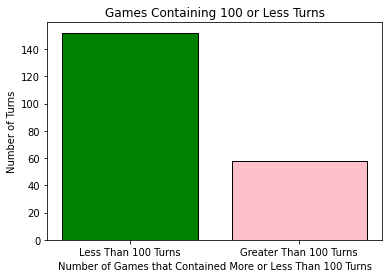

In [15]:
xval = ['Less Than 100 Turns', 'Greater Than 100 Turns']
height = [152, 58]
plt.bar(xval, height,color=['green','pink'],edgecolor='black')
plt.xlabel('Number of Games that Contained More or Less Than 100 Turns')
plt.ylabel('Number of Turns')
plt.title('Games Containing 100 or Less Turns')